In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import illustris_python as il

In [3]:
z = np.arange(0, 4.5, 0.5)
num = [99, 67, 50, 40, 33, 28, 25, 23, 21]
patches = []

/tmp/ipykernel_4112128/2932974115.py:12: RuntimeWarning: divide by zero encountered in log10
  M200c_b = np.log10(np.array(halo_b['Group_M_Crit200'])*1e10)
/tmp/ipykernel_4112128/2932974115.py:15: RuntimeWarning: divide by zero encountered in log10
  M200c_d = np.log10(np.array(halo_d['Group_M_Crit200'])*1e10)
/tmp/ipykernel_4112128/2932974115.py:18: RuntimeWarning: divide by zero encountered in divide
  plt.plot(bins[:-1], (hist_m_b/len(M200c_b))/(hist_m_d/len(M200c_d)), label='TNG100-1', color=color)
/tmp/ipykernel_4112128/2932974115.py:18: RuntimeWarning: invalid value encountered in divide
  plt.plot(bins[:-1], (hist_m_b/len(M200c_b))/(hist_m_d/len(M200c_d)), label='TNG100-1', color=color)
/tmp/ipykernel_4112128/2932974115.py:24: RuntimeWarning: divide by zero encountered in divide
  np.savetxt(f'/data/wbc/CAMELS/alldataprocessing/hmf/data/supression_{z[i]}.txt', np.c_[bins[:-1],hist_m_b/hist_m_d])
/tmp/ipykernel_4112128/2932974115.py:24: RuntimeWarning: invalid value encountered i

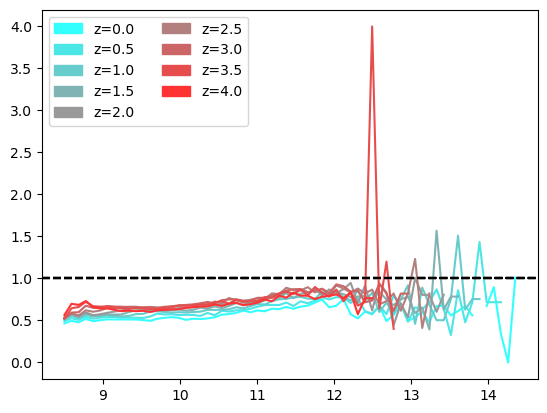

In [56]:
for i in range(9):
    color = ((z[i]+1)/5, 1-(z[i])/5, 1-(z[i])/5)
    path_b = '/data2/wbc/tng/TNG100-1/output/'
    halo_b = il.groupcat.loadHalos(path_b, num[i])

    path_d = '/data2/wbc/tng/TNG100-1-dark/output/'
    halo_d = il.groupcat.loadHalos(path_d, num[i])

    M200c_b = np.log10(np.array(halo_b['Group_M_Crit200'])*1e10)
    hist_m_b, bins = np.histogram(M200c_b, bins=70, range=[8.5, 15], density=False)

    M200c_d = np.log10(np.array(halo_d['Group_M_Crit200'])*1e10)
    hist_m_d, bins = np.histogram(M200c_d, bins=70, range=[8.5, 15], density=False)

    plt.plot(bins[:-1], (hist_m_b/len(M200c_b))/(hist_m_d/len(M200c_d)), label='TNG100-1', color=color)
    plt.axhline(y=1, color='k', ls='--')
    patches.append(mpatches.Patch(color=color, label=f'z={z[i]}'))
    plt.legend(handles=patches,ncol=2)
    #plt.ylim(0,2.5)

    #np.savetxt(f'/data/wbc/CAMELS/alldataprocessing/hmf/data/supression_{z[i]}.txt', np.c_[bins[:-1],hist_m_b/hist_m_d])

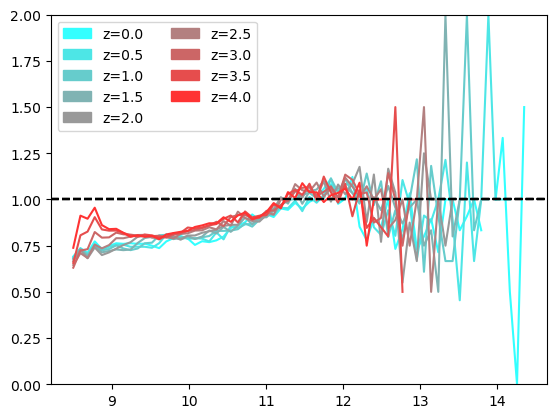

In [4]:
patches = []
for i in range(9):
    color = ((z[i]+1)/5, 1-(z[i])/5, 1-(z[i])/5)
    supression = np.loadtxt(f'/data/wbc/CAMELS/alldataprocessing/hmf/data/supression_{z[i]}.txt')
    plt.plot(supression[:,0], supression[:,1], label=f'z={z[i]}', color=color)
    plt.axhline(y=1, color='k', ls='--')
    patches.append(mpatches.Patch(color=color, label=f'z={z[i]}'))
    plt.legend(handles=patches,ncol=2)
    plt.ylim(0,2)